In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
color_image = cv2.imread("./images/signs_vehicles_xygrad.png")
image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

In [83]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    if orient == "x":
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif orient == "y":
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Apply threshold
    abs_sobel = np.absolute(sobel)
    # convert to 255 image
    abs_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Masking
    grad_binary = np.zeros_like(abs_sobel)
    grad_binary[(abs_sobel > thresh[0]) & (abs_sobel < thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Absolute value
    abs_sobel = np.sqrt(sobelx**2 + sobely**2)
    # Convert to an 8 bit image
    abs_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Apply threshold
    # Masking
    mag_binary = np.zeros_like(abs_sobel)
    mag_binary[(abs_sobel > mag_thresh[0]) & (abs_sobel < mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Absolute value
    abs_sobel = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    # Convert to an 8 bit image
    abs_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Apply threshold
    # Masking
    dir_binary = np.zeros_like(abs_sobel)
    dir_binary[(abs_sobel > thresh[0]) & (abs_sobel < thresh[1])] = 1
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(15, 230))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(35, 230))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(10, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(20, np.pi/3))

In [84]:
combined = np.zeros_like(dir_binary)

In [85]:
combined[(gradx == 1) & (grady == 1) | (mag_binary == 1) & (dir_binary == 1)] = 1

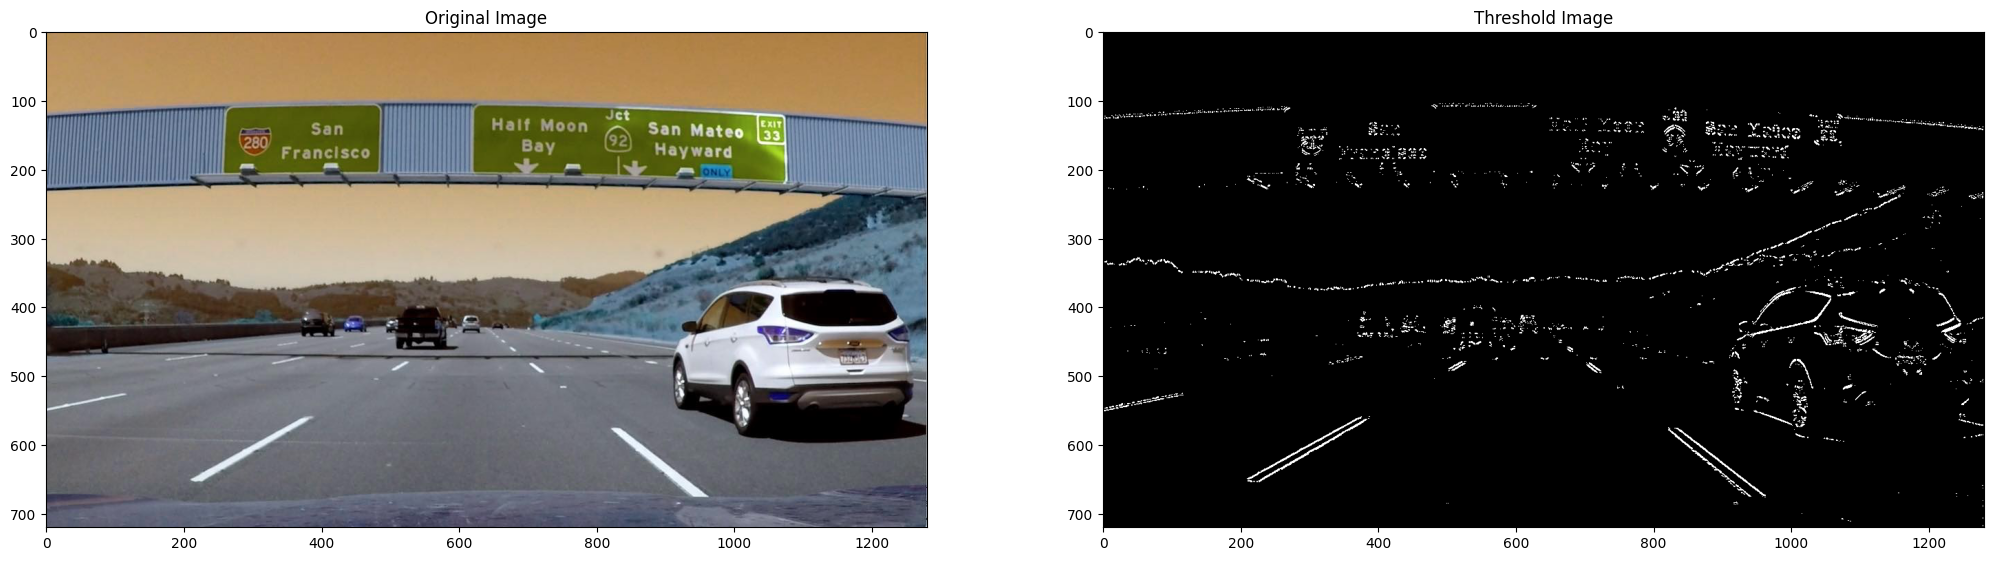

In [86]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 20))
ax1.imshow(color_image)
ax1.set_title("Original Image")
ax2.imshow(combined, cmap="gray")
ax2.set_title("Threshold Image")
plt.show()